<h1>Regresion lineal simple</h1>

In [35]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 

In [114]:
a_experiencia = [1,2,5,6,2,4,6,20,15,1,3,5,5.5]
salario = [500,550,640,670,540,550,620,1500,1200,490,500,650,650]

In [115]:
dt = pd.DataFrame()
dt['aExperiencia'] = a_experiencia
dt['salario'] = salario
dt.head(5)

,aExperiencia,salario
0,1.0,500
1,2.0,550
2,5.0,640
3,6.0,670
4,2.0,540


In [116]:
dt.describe()

,aExperiencia,salario
count,13.000000,13.000000
mean,5.807692,696.923077
std,5.580989,302.830663
min,1.000000,490.000000
25%,2.000000,540.000000
50%,5.000000,620.000000
75%,6.000000,650.000000
max,20.000000,1500.000000


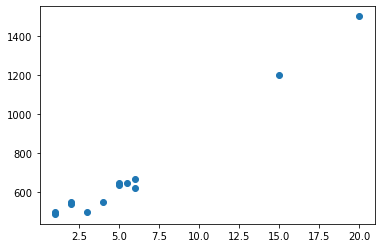

In [117]:
x = np.array(dt.aExperiencia)
y = np.array(dt.salario)

fig,ax = plt.subplots()
ax.scatter(x,y)

In [118]:
#saber el salario de una persona por año de experiencia
X = np.c_[dt.aExperiencia]
y = dt.salario

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = LinearRegression().fit(X_train,y_train)
model_predict = model.predict(X_test)

linear_error = mean_squared_error(y_test,model_predict)
linear_error

1202.4018985003906

In [119]:
# y = b0 + b1*x
b0 = model.intercept_
b1 = np.squeeze(model.coef_)

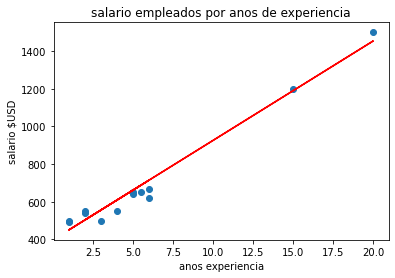

In [120]:

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.plot(X, b0 + b1*X, color='r')
plt.xlabel('anos experiencia')
plt.ylabel('salario $USD')
plt.title('salario empleados por anos de experiencia')
plt.show()

In [121]:
model.score(X_test,y_test)

0.9831241838806962

<h1>Regresion Logistica</h1>

In [18]:
import pandas as pd
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#importar csv
dt = pd.read_csv('./Downloads/diabetes.csv')
dt.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dt.shape

(768, 9)

In [15]:
#seleccion de features y target
X = dt.drop(['Outcome'],axis=1)
y = dt.Outcome

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [20]:
logistic_model = LogisticRegression().fit(X_train,y_train)
y_predict = logistic_model.predict(X_test)

/Users/patodev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [23]:
cnf_matrix = confusion_matrix(y_test,y_predict)
cnf_matrix

array([[141,  16],
       [ 35,  39]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

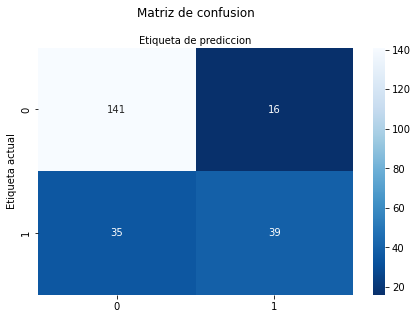

In [32]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names),
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot = True, cmap= 'Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion',y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

En la posicion 0,0 se muestran la cantidad de pacientes que fueron clasificados de forma correcta, en la 1,1 son la cantidad de pacientes clasificados correctamente cuando es un negativo, 0,1 aquellos que fueron clasificados incorrectamente como negativos y 1,0 aquellos incorrectamente como positivos.

In [38]:
print(f"Exactitud : {accuracy_score(y_test,y_predict)}")

Exactitud : 0.7792207792207793


<h1>Arbol de decision</h1>
trabajaremos con el dataset de titanic

In [47]:
import pandas as pd 
import numpy as np 

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
test_df = pd.read_csv('./Downloads/titanic-test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df = pd.read_csv('./Downloads/titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


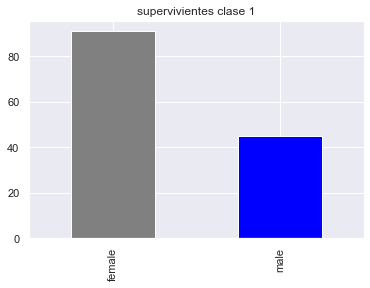

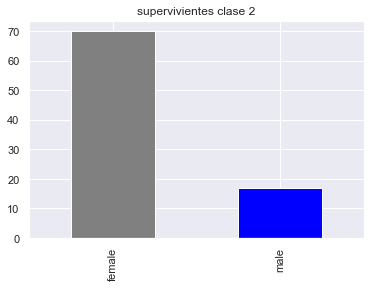

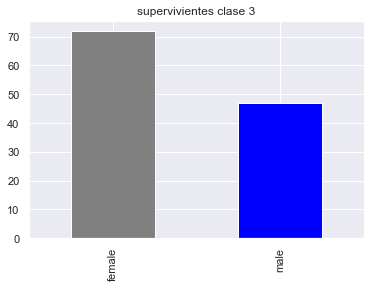

In [46]:
df_train_c = train_df.copy()

clases = list(np.unique(df_train_c.Pclass))
supervivientes = df_train_c[df_train_c.Survived == 1]

for clase in clases:
    supervivientes[supervivientes.Pclass == clase].Sex.value_counts().plot(kind='bar',color=['grey','blue'])
    plt.title(f'supervivientes clase {clase}')
    plt.show()


In [50]:
label_encoder = preprocessing.LabelEncoder()
encoder_sex = label_encoder.fit_transform(df_train_c['Sex'])


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [54]:
#cambiar datos nulos 
df_train_c.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.750,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.000,NaN,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.250,NaN,Q
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.100,NaN,S


In [62]:
df_train_c.Age = df_train_c.Age.fillna(df_train_c['Age'].median())
df_train_c.Embarked = df_train_c.Embarked.fillna('S')

In [63]:
df_train_c.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
240,241,0,3,"Zabour, Miss. Thamine",female,29.699118,1,0,2665,14.4542,NaN,C
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0000,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.000000,1,0,35273,113.2750,D36,C
613,614,0,3,"Horgan, Mr. John",male,29.699118,0,0,370377,7.7500,NaN,Q
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.000000,1,0,17474,57.0000,B20,S


In [72]:
train_predictors = df_train_c.drop(['PassengerId','Name','Survived','Ticket','Cabin'],axis=1)

categorical_cols = [cname for cname in train_predictors.columns if 
                       train_predictors[cname].nunique() < 10 and
                       train_predictors[cname].dtype == 'object'
                   ]

['Sex', 'Embarked']

In [73]:
numerical_cols = [cname for cname in train_predictors.columns if 
                     train_predictors[cname].dtype in ['int64','float64']
                 ]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [76]:
my_cols = categorical_cols + numerical_cols
my_cols

['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [78]:
train_predictors = train_predictors[my_cols]
train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.000000,1,0,7.2500
1,female,C,1,38.000000,1,0,71.2833
2,female,S,3,26.000000,0,0,7.9250
3,female,S,1,35.000000,1,0,53.1000
4,male,S,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.000000,0,0,13.0000
887,female,S,1,19.000000,0,0,30.0000
888,female,S,3,29.699118,1,2,23.4500
889,male,C,1,26.000000,0,0,30.0000


In [81]:
dummy_train_predictors = pd.get_dummies(train_predictors)
dummy_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [90]:
y_target = df_train_c.Survived.values
X_features_one = dummy_train_predictors.values

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X_features_one,y_target,test_size=0.3,random_state=42)

In [96]:
model = tree.DecisionTreeClassifier().fit(X_train,y_train)

In [100]:
model_accuracy = round(model.score(X_test,y_test),4)
model_accuracy

0.7463

In [101]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [106]:
model.predict(np.array([[3,50,1,0,7,1,0,0,0,1]]))

array([0])

In [107]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14,6))
plot_tree(model)

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

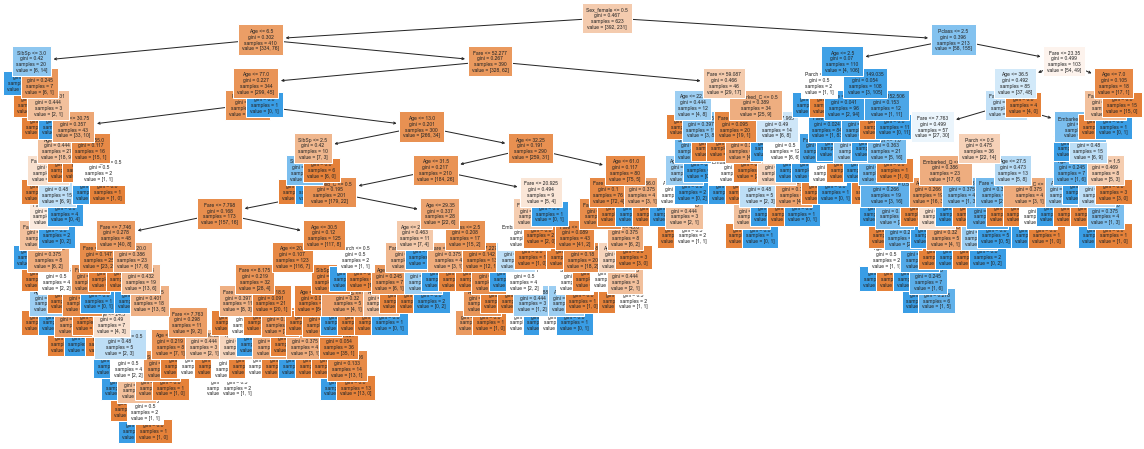

In [110]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
plot_tree(decision_tree = model, feature_names = dummy_train_predictors.columns, filled = True, fontsize=5);

<h1>KNeighbors</h1>

In [40]:
import pandas as pd 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:


dt = pd.read_csv('./Downloads/diabetes.csv')
dt.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
42,7,106,92,18,0,22.7,0.235,48,0
313,3,113,50,10,85,29.5,0.626,25,0
245,9,184,85,15,0,30.0,1.213,49,1
82,7,83,78,26,71,29.3,0.767,36,0
639,1,100,74,12,46,19.5,0.149,28,0


In [51]:
X = dt.drop(['Outcome'],axis=1)
y = dt['Outcome']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [64]:
best_score = 999

for i in range(0,20):
    
    knn = KNeighborsClassifier().fit(X_train,y_train)
    knn_predict = knn.predict(X_test)
    
    score = accuracy_score(knn_predict,y_test)
    
    if score < best_score:
        best_score = score

best_score

0.7359307359307359

<h1>k-means</h1>
usaremos el data set de iris

In [14]:
import pandas as pd 

from sklearn.cluster import MiniBatchKMeans

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
dt = pd.read_csv('./Downloads/iris.csv')
dt.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
105,7.6,3.0,6.6,2.1,Virginica
7,5.0,3.4,1.5,0.2,Setosa
124,6.7,3.3,5.7,2.1,Virginica
132,6.4,2.8,5.6,2.2,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [5]:
X = dt.drop(['variety'],axis=1)

In [18]:
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=1024).fit(X)
kmeans.cluster_centers_

array([[5.90566224, 2.75155096, 4.39773511, 1.43500739],
       [4.99795304, 3.42396147, 1.45580975, 0.24557495],
       [6.84992051, 3.07583466, 5.76613672, 2.09650238]])

In [19]:
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [20]:
dt['Kmeans predict'] = kmeans.predict(X)

In [21]:
dt.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety,Kmeans predict
102,7.1,3.0,5.9,2.1,Virginica,2
27,5.2,3.5,1.5,0.2,Setosa,1
118,7.7,2.6,6.9,2.3,Virginica,2
121,5.6,2.8,4.9,2.0,Virginica,0
4,5.0,3.6,1.4,0.2,Setosa,1


<AxesSubplot:xlabel='sepal.length', ylabel='petal.length'>

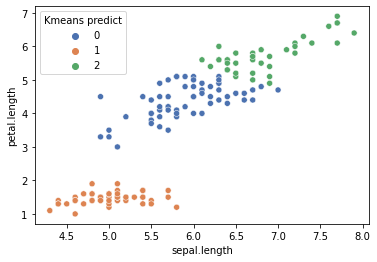

In [22]:
sns.scatterplot(data=dt,x='sepal.length',y='petal.length',hue='Kmeans predict',palette='deep')

<AxesSubplot:xlabel='sepal.length', ylabel='petal.length'>

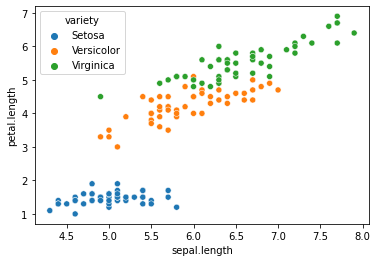

In [23]:
sns.scatterplot(data=dt,x='sepal.length',y='petal.length',hue='variety')

<h1>Mean shift</h1>

In [33]:
import pandas as pd 
import seaborn as sns

from sklearn.cluster import MeanShift


In [25]:
dt = pd.read_csv('./Downloads/iris.csv')
dt.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
141,6.9,3.1,5.1,2.3,Virginica
26,5.0,3.4,1.6,0.4,Setosa
146,6.3,2.5,5.0,1.9,Virginica
28,5.2,3.4,1.4,0.2,Setosa
41,4.5,2.3,1.3,0.3,Setosa


In [26]:
X = dt.drop(['variety'],axis=1)

In [28]:
meanshift = MeanShift().fit(X)
max(meanshift.labels_)

1

In [29]:
meanshift.cluster_centers_

array([[6.21142857, 2.89285714, 4.85285714, 1.67285714],
       [5.01632653, 3.45102041, 1.46530612, 0.24489796]])

In [32]:
dt['Meanshift predict'] = meanshift.labels_
dt.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety,Meanshift predict
115,6.4,3.2,5.3,2.3,Virginica,0
19,5.1,3.8,1.5,0.3,Setosa,1
73,6.1,2.8,4.7,1.2,Versicolor,0
46,5.1,3.8,1.6,0.2,Setosa,1
70,5.9,3.2,4.8,1.8,Versicolor,0


<AxesSubplot:xlabel='sepal.length', ylabel='petal.length'>

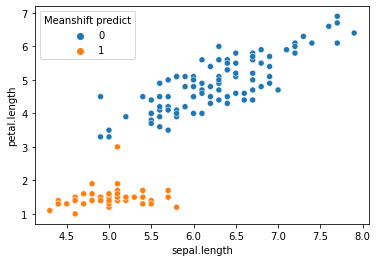

In [35]:
sns.scatterplot(data=dt,x='sepal.length',y='petal.length',hue='Meanshift predict')

<h1>Aprendizaje profundo</h1>